In [2]:
import numpy as np
import torch
import scanpy as sc
from data import PertDataloader, Network


name2path = {
    'GNN_Disentangle-L2': 'GNN_Disentangle_GAT_string_20.0_64_2_l2_Norman2019_gene_emb_pert_emb_constant_sim_gnn',
    'GNN_Disentangle_Sim': 'GNN_Disentangle_GAT_string_20.0_64_2_l3_Norman2019_gamma2_gene_emb_pert_emb_constant_sim_gnn',
    'GNN_Disentangle_Sim_No_Gene': 'GNN_Disentangle_sim_gnn', 
    'No-Perturb': 'No_Perturb_GAT_string_20.0_64_2_l3_Norman2019_gamma2_gene_emb_pert_emb_constant_sim_gnn',
    'uncertainty': 'GNN_Disentangle_GAT_string_20.0_64_2_l3_Norman2019_gamma2_gene_emb_pert_emb_constant_sim_gnn_uncertainty_1.0_1.0',
    'uncertainty-reg10': 'GNN_Disentangle_GAT_string_20.0_64_2_l3_Norman2019_gamma2_gene_emb_pert_emb_constant_sim_gnn_uncertainty_10.0_1.0'

}


name = 'uncertainty-reg10'

model_name = name2path[name]
args = np.load('./saved_args/'+model_name+'.npy', allow_pickle = True).item()
args['device'] = 'cuda:5'

In [2]:
#import wandb
#wandb.init(project='pert_gnn_simulation', entity='kexinhuang', name=name)

In [3]:
if args['network_name'] == 'string':
    args['network_path'] = '/dfs/project/perturb-gnn/graphs/STRING_full_9606.csv'

if args['dataset'] == 'Norman2019':
    data_path = '/dfs/project/perturb-gnn/datasets/Norman2019/Norman2019_hvg+perts_more_de.h5ad'

adata = sc.read_h5ad(data_path)
if 'gene_symbols' not in adata.var.columns.values:
    adata.var['gene_symbols'] = adata.var['gene_name']
gene_list = [f for f in adata.var.gene_symbols.values]
# Set up message passing network
network = Network(fname=args['network_path'], gene_list=args['gene_list'],
                  percentile=args['top_edge_percent'])

# Pertrubation dataloader
pertdl = PertDataloader(adata, network.G, network.weights, args)

There are 101013 edges in the PPI.
Creating pyg object for each cell in the data...
Local copy of pyg dataset is detected. Loading...
Loading splits...
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:9
combo_seen1:52
combo_seen2:18
unseen_single:37
Creating dataloaders....
Dataloaders created...


In [4]:
#args['uncertainty'] = False
#args['no_pert_emb'] = False
#args['batchnorm'] = False
#args['skipsum'] = False
#args['no_disentangle'] = False

In [5]:
model = torch.load('./saved_models/' + model_name)
#model.pert_emb_agg = 'constant'
#model.lambda_emission = False
#model.sim_gnn = False
#model.args = args
#model.uncertainty = False
#from torch.nn import ReLU
#model.act = ReLU()
from inference import evaluate, compute_metrics, deeper_analysis, GI_subgroup

test_res = evaluate(pertdl.loaders['test_loader'],
                        pertdl.loaders['edge_index'],
                        pertdl.loaders['edge_attr'], model, args)

test_metrics, test_pert_res = compute_metrics(test_res)

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/dfs/user/kexinh/miniconda3/

In [6]:
out = deeper_analysis(adata, test_res)
GI_out = GI_subgroup(out)

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

In [7]:
loader = pertdl.loaders['test_loader']
graph = pertdl.loaders['edge_index']

In [8]:

model.eval()
pert_cat = []
pred = []
truth = []
logvar = []
results = {}

for batch in loader:
    batch.to(args['device'])
    model.to(args['device'])
    graph = graph.to(args['device'])

    pert_cat.extend(batch.pert)

    with torch.no_grad():
        p, unc = model(batch, graph, None)
        t = batch.y
        
        pred.extend(p.cpu())
        truth.extend(t.cpu())
        logvar.extend(unc.cpu())
        
# all genes
results['pert_cat'] = np.array(pert_cat)

pred = torch.stack(pred)
truth = torch.stack(truth)
logvar = torch.stack(logvar)
results['pred']= pred.detach().cpu().numpy()
results['truth']= truth.detach().cpu().numpy()
results['logvar']= logvar.detach().cpu().numpy()

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 10)})

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

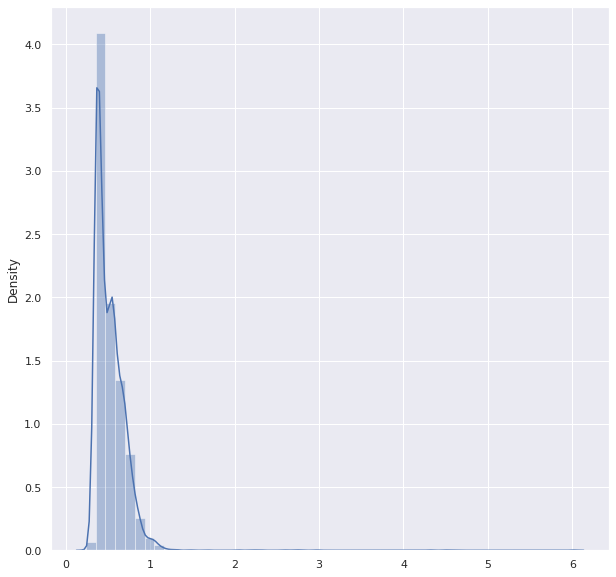

In [15]:
sns.distplot([np.std(results['logvar'][:, i]) for i in range(5045)])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

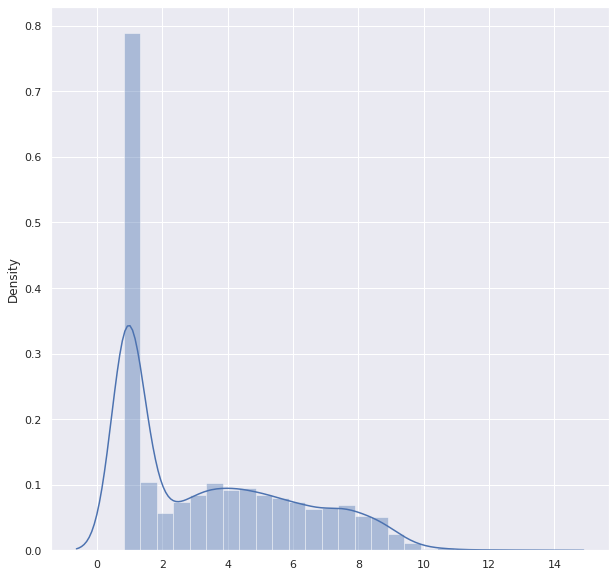

In [16]:
sns.distplot([np.mean(results['logvar'][:, i]) for i in range(5045)])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

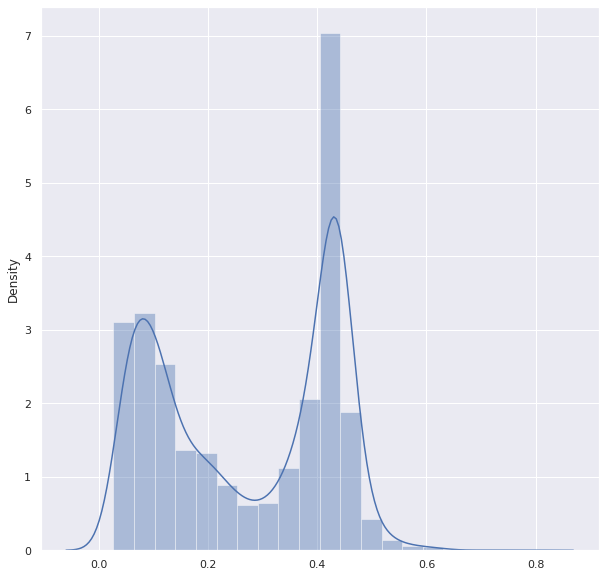

In [17]:
sns.distplot([np.std(results['logvar'][:, i])/np.mean(results['logvar'][:, i]) for i in range(5045)])

In [18]:
# calculate mean expression for each condition
unique_conditions = adata.obs.condition.unique()
conditions2index = {}
for i in unique_conditions:
    conditions2index[i] = np.where(adata.obs.condition == i)[0]
    
condition2mean_expression = {}
for i, j in conditions2index.items():
    condition2mean_expression[i] = np.mean(adata.X[j], axis = 0)
    
pert_list = np.array(list(condition2mean_expression.keys()))
mean_expression = np.array(list(condition2mean_expression.values())).reshape(len(adata.obs.condition.unique()), adata.X.toarray().shape[1])

ctrl = mean_expression[np.where(pert_list == 'ctrl')[0]]
most_variable_genes = np.argsort(np.std(mean_expression, axis = 0))[-200:]
gene_list = adata.var['gene_name'].values

In [19]:
results['logvar'][:, most_variable_genes]

array([[ 7.7187357,  9.498968 ,  5.8536124, ...,  9.985259 , 10.920428 ,
        11.991542 ],
       [ 8.434034 ,  9.082541 ,  5.8536124, ..., 10.919579 , 10.866729 ,
        11.465276 ],
       [ 8.37148  ,  9.322196 ,  5.8536124, ..., 10.26485  , 10.99688  ,
        11.459735 ],
       ...,
       [ 7.8723755,  8.71601  ,  5.3709917, ..., 11.262939 , 10.73041  ,
        14.8138685],
       [ 7.790739 ,  8.817009 ,  5.3709917, ...,  9.598998 , 10.768636 ,
        14.882927 ],
       [ 7.7416553,  8.894931 ,  5.3709917, ..., 11.262939 , 10.338639 ,
        11.565741 ]], dtype=float32)

In [20]:
import pandas as pd
pert2unc = pd.DataFrame(tuple(zip(results['pert_cat'], np.mean(results['logvar'], axis = 1)))).groupby(0).agg(np.mean)
pert2unc = dict(zip(pert2unc.index.values, pert2unc.values))

In [21]:
top20_var, top50_var, top100_var = {}, {}, {}
pert2pert_full_id = dict(adata.obs[['condition', 'cov_drug_dose_name']].values)
geneid2name = dict(zip(adata.var.index.values, adata.var['gene_name']))
geneid2idx = dict(zip(adata.var.index.values, range(len(adata.var.index.values))))

for pert in np.unique(test_res['pert_cat']):
    #de_names = [geneid2name[i] for i in adata.uns['rank_genes_groups_cov'][pert2pert_full_id[pert]]]
    de_idx = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov'][pert2pert_full_id[pert]]]
    de_idx_100 = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov_top100'][pert2pert_full_id[pert]]]
    de_idx_50 = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov_top50'][pert2pert_full_id[pert]]]
    
    pert_idx = np.where(test_res['pert_cat'] == pert)[0]
    
    top20_var[pert] = np.mean(results['logvar'][pert_idx][:, de_idx], axis = 0)
    top50_var[pert] = np.mean(results['logvar'][pert_idx][:, de_idx_50], axis = 0)
    top100_var[pert] = np.mean(results['logvar'][pert_idx][:, de_idx_100], axis = 0)

In [22]:
results['logvar'][pert_idx][:, de_idx].shape

(336, 20)

In [25]:
from scipy.stats import spearmanr, pearsonr

In [26]:
metric = 'pearson_delta_top50_de'
stats_summary = [pert2unc[i][0] for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
print(spearmanr(stats_summary, metric_summary))
print(pearsonr(stats_summary, metric_summary))

SpearmanrResult(correlation=0.24234036827739974, pvalue=0.008766950637452958)
(0.13494694000737817, 0.14865507307924933)


In [27]:
metric = 'pearson_delta'
stats_summary = [pert2unc[i][0] for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
print(spearmanr(stats_summary, metric_summary))
print(pearsonr(stats_summary, metric_summary))

SpearmanrResult(correlation=0.44407027255602965, pvalue=5.93803438584141e-07)
(0.49844376210521046, 1.241552817453811e-08)


In [28]:
metric = 'pearson_delta'
stats_summary = [-np.exp(-pert2unc[i][0]) for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
print(spearmanr(stats_summary, metric_summary))
print(pearsonr(stats_summary, metric_summary))

SpearmanrResult(correlation=0.44407027255602965, pvalue=5.93803438584141e-07)
(0.38537308151816185, 1.9385932885857354e-05)


In [29]:
pert2status = {}

for i in ['combo_seen1', 'combo_seen2', 'combo_seen0', 'unseen_single']:
    for k in pertdl.subgroup['test_subgroup'][i]:
        pert2status[k] = i

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

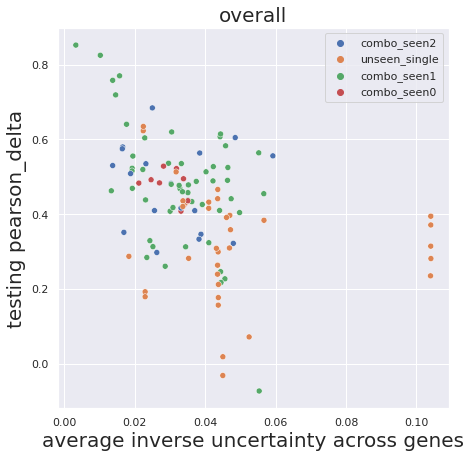

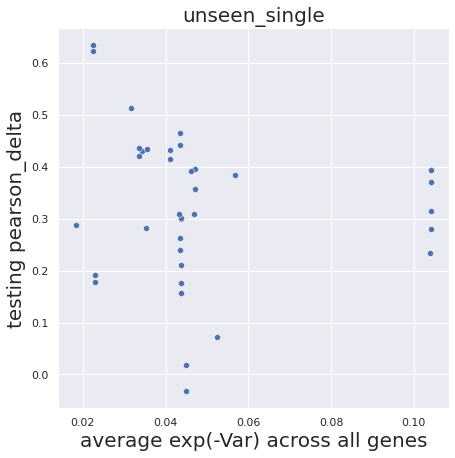

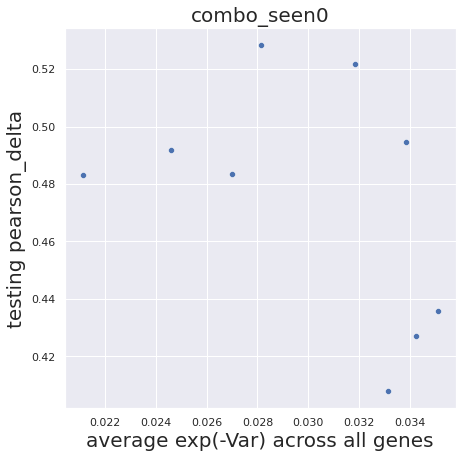

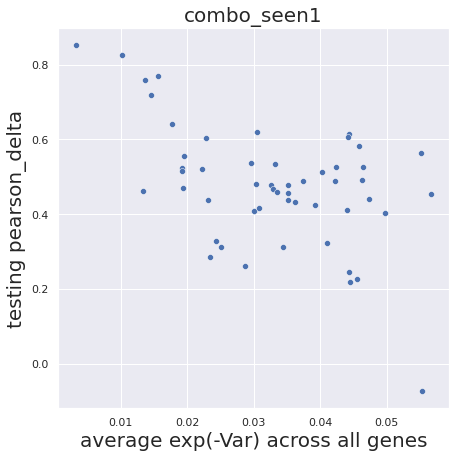

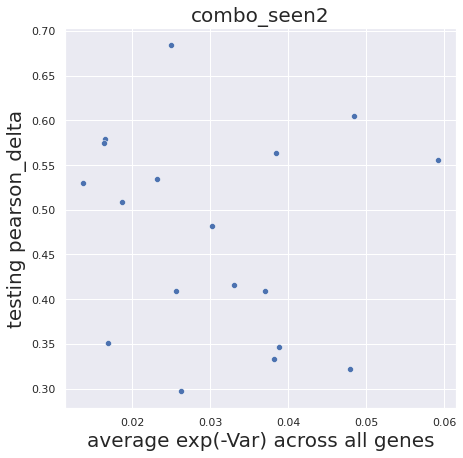

In [30]:
import matplotlib.pyplot as plt
metric = 'pearson_delta'
sns.set(rc={'figure.figsize':(7, 7)})

plt.figure()
stats_summary = [np.exp(-pert2unc[i][0]) for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
#reduce_outlier = np.where(stats_summary < np.quantile(stats_summary, 0.85))[0]

ax = sns.scatterplot(np.array(stats_summary),
                np.array(metric_summary), hue = [pert2status[i] for i in test_pert_res.keys()])
ax.set_xlabel('average inverse uncertainty across genes', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)
ax.set_title('overall', fontsize = 20)

for x in ['unseen_single', 'combo_seen0', 'combo_seen1', 'combo_seen2']:
    plt.figure()
    stats_summary = [np.exp(-pert2unc[i][0]) for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    metric_summary = [out[i][metric] for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    #reduce_outlier = np.where(stats_summary < np.quantile(stats_summary, 0.85))[0]
    
    ax = sns.scatterplot(np.array(stats_summary),
                    np.array(metric_summary))
    ax.set_xlabel('average exp(-Var) across all genes', fontsize = 20)
    ax.set_ylabel('testing ' + metric, fontsize = 20)
    ax.set_title(x, fontsize = 20)
    

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

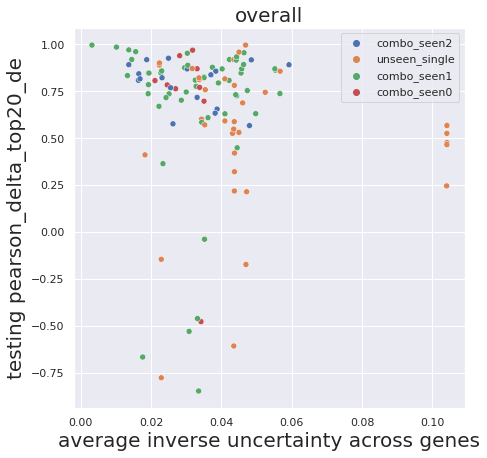

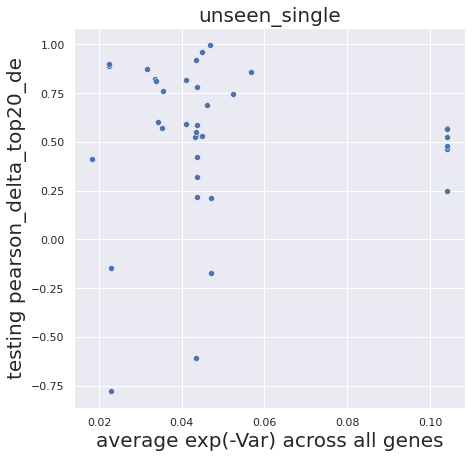

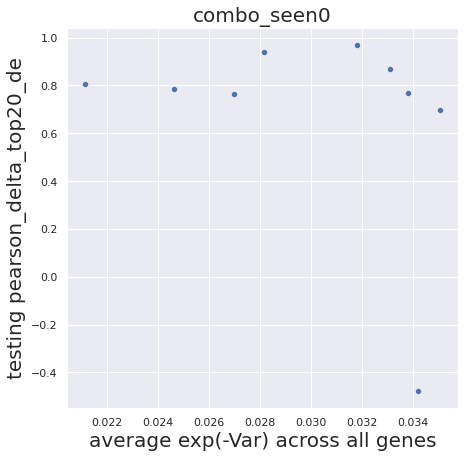

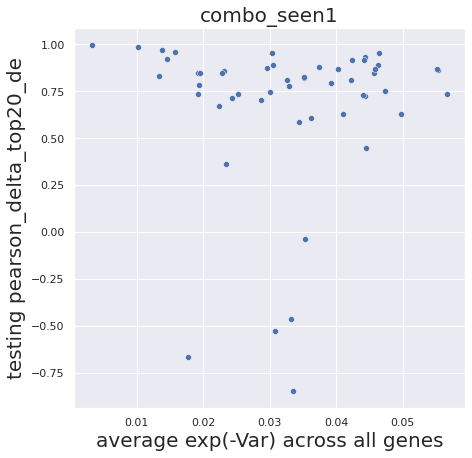

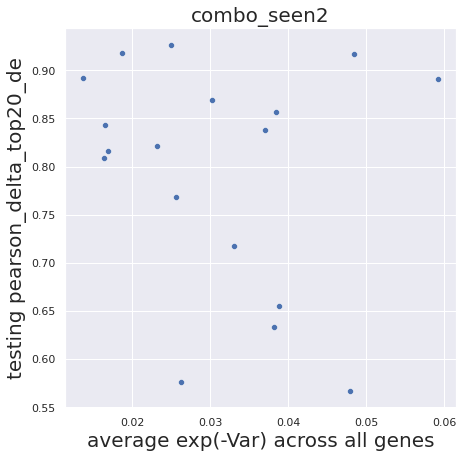

In [31]:
import matplotlib.pyplot as plt
metric = 'pearson_delta_top20_de'
sns.set(rc={'figure.figsize':(7, 7)})

plt.figure()
stats_summary = [np.exp(-pert2unc[i][0]) for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
#reduce_outlier = np.where(stats_summary < np.quantile(stats_summary, 0.85))[0]

ax = sns.scatterplot(np.array(stats_summary),
                np.array(metric_summary), hue = [pert2status[i] for i in test_pert_res.keys()])
ax.set_xlabel('average inverse uncertainty across genes', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)
ax.set_title('overall', fontsize = 20)

for x in ['unseen_single', 'combo_seen0', 'combo_seen1', 'combo_seen2']:
    plt.figure()
    stats_summary = [np.exp(-pert2unc[i][0]) for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    metric_summary = [out[i][metric] for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    #reduce_outlier = np.where(stats_summary < np.quantile(stats_summary, 0.85))[0]
    
    ax = sns.scatterplot(np.array(stats_summary),
                    np.array(metric_summary))
    ax.set_xlabel('average exp(-Var) across all genes', fontsize = 20)
    ax.set_ylabel('testing ' + metric, fontsize = 20)
    ax.set_title(x, fontsize = 20)
    

In [32]:
import warnings
warnings.filterwarnings("ignore")


In [33]:
top = np.quantile(np.array(list(pert2unc.values())), 0.9)

---- pearson_delta----
Total Mean: 0.42789909878960763
After uncertainty filter Mean: 0.6125231536019469
---- mse_top20_de----
Total Mean: 0.19127904
After uncertainty filter Mean: 0.20503563
---- mse_top50_de----
Total Mean: 0.121286616
After uncertainty filter Mean: 0.13614574
---- frac_in_range_25_75----
Total Mean: 0.4883655649619272
After uncertainty filter Mean: 0.47556128082443877
---- frac_sigma_below_1----
Total Mean: 0.7441785636756827
After uncertainty filter Mean: 0.7000866007057958
---- pearson_delta_top50_de----
Total Mean: 0.6506990360544725
After uncertainty filter Mean: 0.7223415480218084


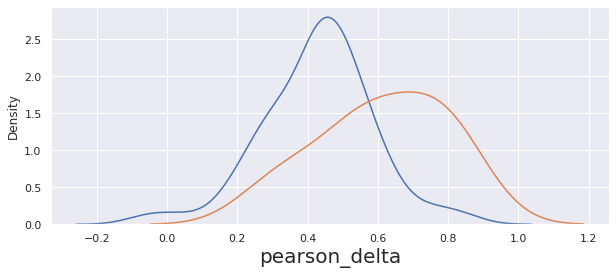

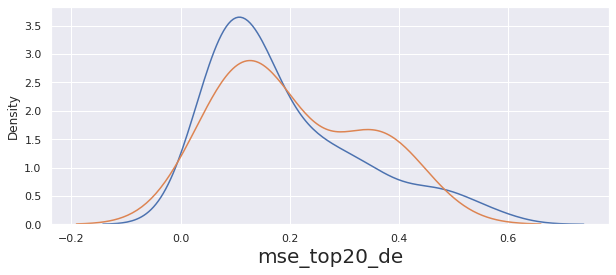

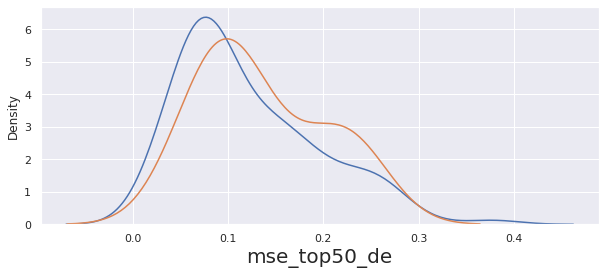

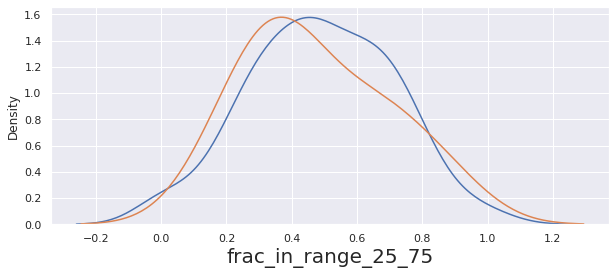

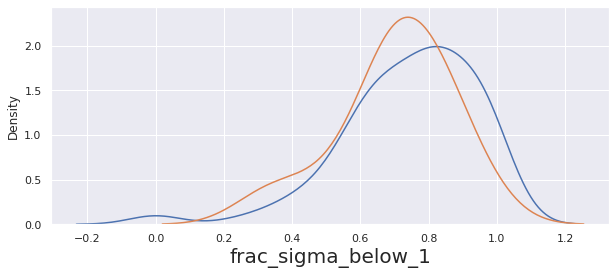

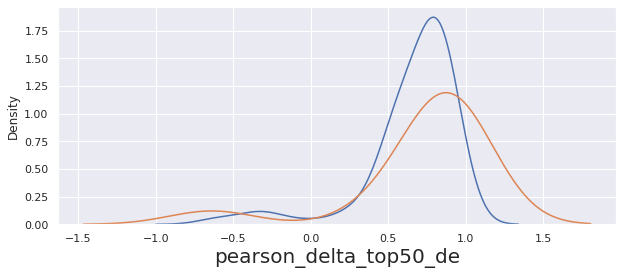

In [34]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 4)})


for m in ['pearson_delta', 'mse_top20_de', 'mse_top50_de', 'frac_in_range_25_75', 'frac_sigma_below_1', 'pearson_delta_top50_de']:
    plt.figure()
    ax = sns.distplot([i[m] for i in out.values() if m in i], hist = False)
    ax = sns.distplot([i[m] for k, i in out.items() if (pert2unc[k][0] > top) and (m in i)], hist = False)
    print('---- ' + m + '----')
    print('Total Mean: ' + str(np.mean([i[m] for i in out.values() if m in i])))
    print('After uncertainty filter Mean: ' + str(np.mean([i[m] for k, i in out.items() if (pert2unc[k][0] > top) and (m in i)])))

    ax.set_xlabel(m, fontsize = 20)

In [35]:
pred_mean_20, pred_mean_50, pred_mean_100 = {}, {}, {}
true_mean_20, true_mean_50, true_mean_100 = {}, {}, {}
std_20, std_50, std_100 = {}, {}, {}
gap_20, gap_50, gap_100 = {}, {}, {}

for pert in np.unique(test_res['pert_cat']):
    de_idx = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov'][pert2pert_full_id[pert]]]
    de_idx_100 = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov_top100'][pert2pert_full_id[pert]]]
    de_idx_50 = [geneid2idx[i] for i in adata.uns['rank_genes_groups_cov_top50'][pert2pert_full_id[pert]]]

    pert_idx = np.where(test_res['pert_cat'] == pert)[0]
    pred_mean_20[pert] = np.mean(test_res['pred'][pert_idx][:, de_idx], axis = 0)- ctrl[0][de_idx]
    true_mean_20[pert] = np.mean(test_res['truth'][pert_idx][:, de_idx], axis = 0) - ctrl[0][de_idx]
    
    std_20[pert] = np.std(test_res['truth'][pert_idx][:, de_idx] - ctrl[0][de_idx], axis = 0)
    gap_20[pert] = np.abs(pred_mean_20[pert] - true_mean_20[pert])/std_20[pert]

<AxesSubplot:>

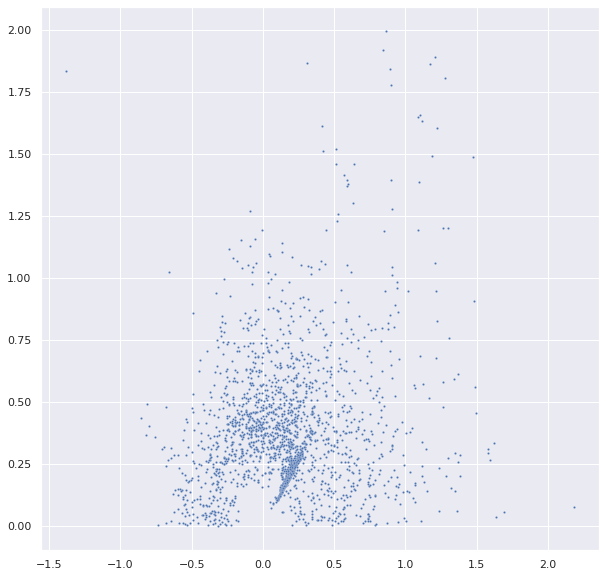

In [36]:
mse_all = []
var_all = []

for pert in test_pert_res.keys():
    s = np.abs(pred_mean_20[pert] - true_mean_20[pert]).reshape(1, -1)[0].reshape(1,-1)
    mse = s
    mse_all.extend(mse)
    var_all.extend(pred_mean_20[pert].reshape(1, -1)[0])
    
sns.set(rc={'figure.figsize':(10, 10)})
sns.scatterplot(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,), s = 5)


In [37]:
print(spearmanr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))
print(pearsonr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))

SpearmanrResult(correlation=0.04809268312233029, pvalue=0.02052867154501265)
(0.1551503441098787, 5.71079368254853e-14)


Text(0, 0.5, 'MSE')

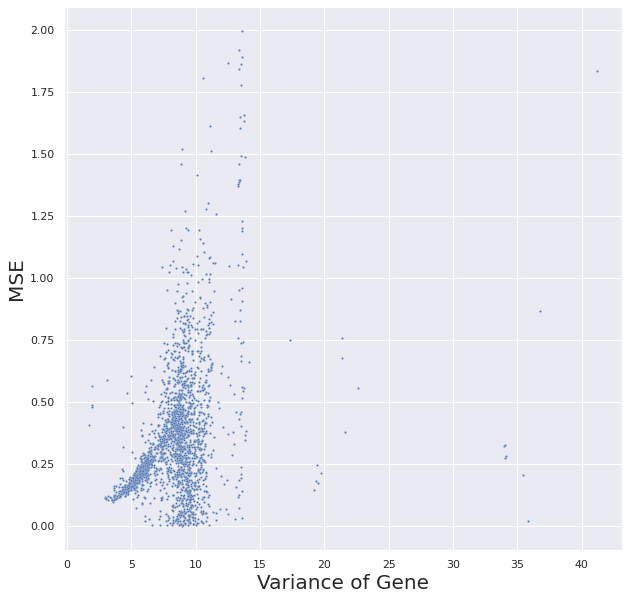

In [38]:
mse_all = []
var_all = []

for pert in test_pert_res.keys():
    s = np.abs(pred_mean_20[pert] - true_mean_20[pert]).reshape(1, -1)[0].reshape(1,-1)
    mse = s
    mse_all.extend(mse)
    var_all.extend(top20_var[pert].reshape(1, -1)[0])
    
sns.set(rc={'figure.figsize':(10, 10)})
ax = sns.scatterplot(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,), s = 5)
ax.set_xlabel("Variance of Gene", fontsize = 20)
ax.set_ylabel("MSE", fontsize = 20)

In [39]:
print(spearmanr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))
print(pearsonr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))

SpearmanrResult(correlation=0.40537038608944326, pvalue=1.7856880473107178e-92)
(0.3839110339677946, 2.3721234307422257e-82)


<AxesSubplot:>

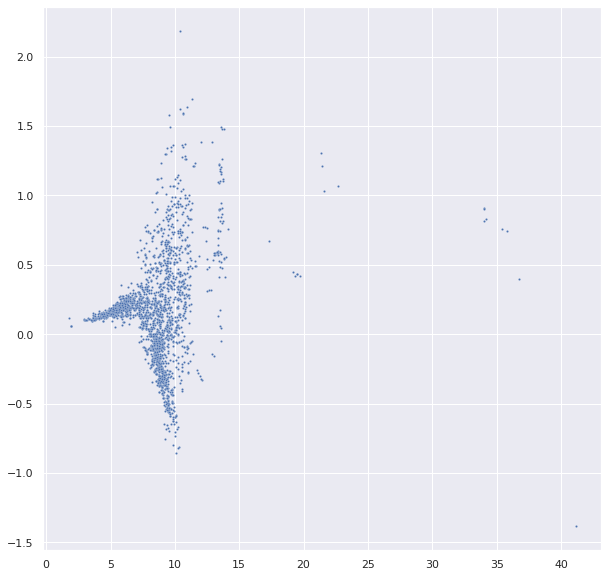

In [40]:
mse_all = []
var_all = []

for pert in test_pert_res.keys():
    s = pred_mean_20[pert].reshape(1, -1)[0].reshape(1,-1)
    mse_all.extend(s)
    var_all.extend(top20_var[pert].reshape(1, -1)[0])
    
sns.set(rc={'figure.figsize':(10, 10)})
sns.scatterplot(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,), s = 5)


In [41]:
print(spearmanr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))
print(pearsonr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))

SpearmanrResult(correlation=0.09637074931847635, pvalue=3.3168562847008594e-06)
(0.17840343213944232, 4.802808930760615e-18)


<AxesSubplot:>

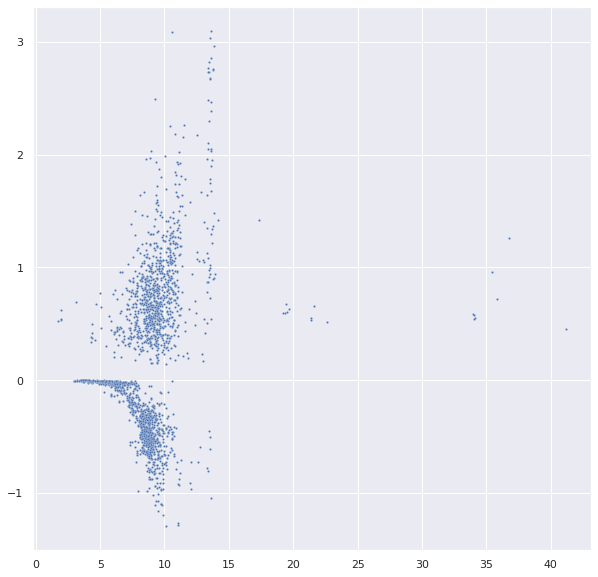

In [42]:
mse_all = []
var_all = []

for pert in test_pert_res.keys():
    s = true_mean_20[pert].reshape(1, -1)[0].reshape(1,-1)
    mse_all.extend(s)
    var_all.extend(top20_var[pert].reshape(1, -1)[0])
    
sns.set(rc={'figure.figsize':(10, 10)})
sns.scatterplot(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,), s = 5)


In [43]:
print(spearmanr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))
print(pearsonr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))

SpearmanrResult(correlation=0.2389858465464039, pvalue=1.7218678834855797e-31)
(0.304881701517458, 4.230654037365181e-51)


<AxesSubplot:>

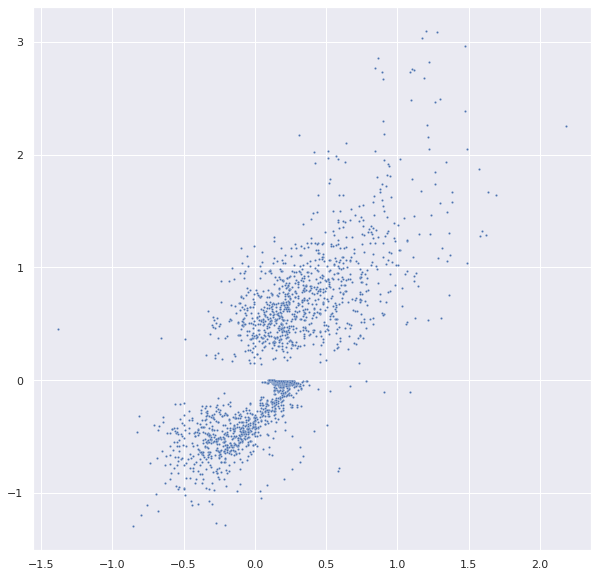

In [44]:
mse_all = []
var_all = []

for pert in test_pert_res.keys():
    s = true_mean_20[pert].reshape(1, -1)[0].reshape(1,-1)
    mse_all.extend(s)
    var_all.extend(pred_mean_20[pert].reshape(1, -1)[0].reshape(1,-1))
    
sns.set(rc={'figure.figsize':(10, 10)})
sns.scatterplot(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,), s = 5)


In [45]:
print(spearmanr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))
print(pearsonr(np.stack(var_all).reshape(-1,), np.stack(mse_all).reshape(-1,)))

SpearmanrResult(correlation=0.7054516951814701, pvalue=0.0)
(0.7563743727090817, 0.0)


In [46]:
def get_plot(pert):
    print(out[pert]['pearson_delta_top20_de'])
    sns.set(rc={'figure.figsize':(10, 4)})

    var = top20_var[pert].reshape(1, -1)[0] 
    ax = sns.heatmap(np.vstack((true_mean_20[pert].reshape(1,-1), pred_mean_20[pert].reshape(1,-1))))
    t = ax.set_yticklabels(['True', 'Predicted'])
    ax.set(xticklabels=[])  

    sns.set(rc={'figure.figsize':(10, 2)})

    plt.figure()
    s = np.abs(pred_mean_20[pert] - true_mean_20[pert]).reshape(1, -1)[0].reshape(1,-1)
    ax3 = sns.heatmap(s**2, cmap="Blues")
    t = ax3.set_yticklabels(['MSE'])
    ax3.set(xticklabels=[])  

    plt.figure()
    ax2 = sns.heatmap(var.reshape(1, -1), cmap="Blues")
    t = ax2.set_yticklabels(['Uncertainty'])
    t = ax2.set_xticklabels([geneid2name[i] for i in adata.uns['rank_genes_groups_cov'][pert2pert_full_id[pert]]], rotation = 90)


0.8624567570003583


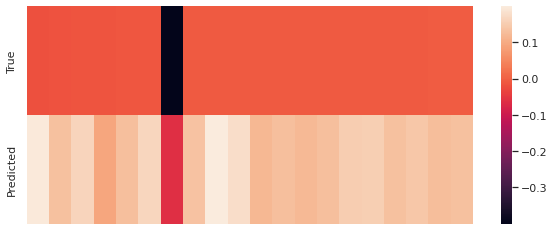

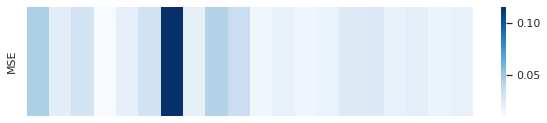

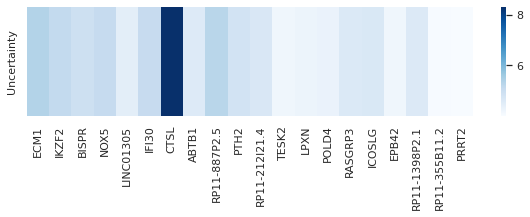

In [47]:
get_plot('BCL2L11+BAK1')

0.5845786379715585


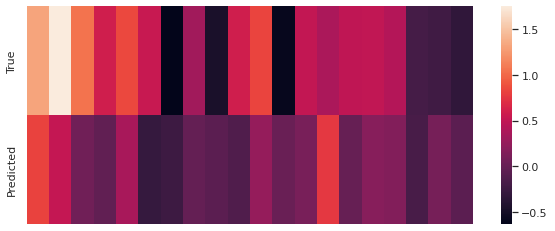

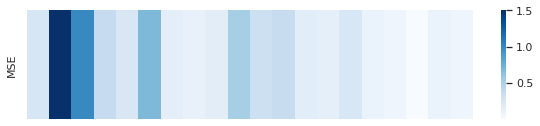

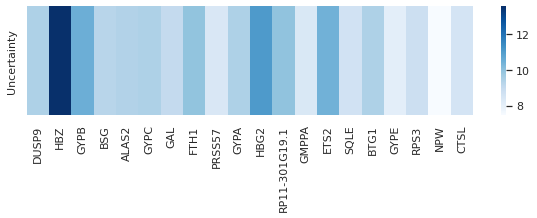

In [48]:
get_plot('DUSP9+ETS2')

0.4108619672432101


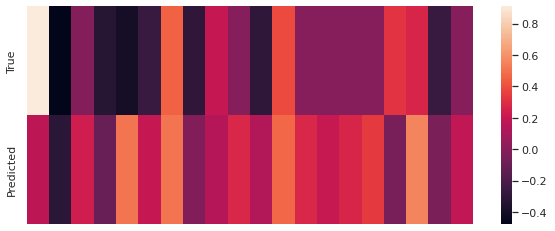

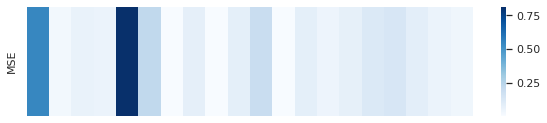

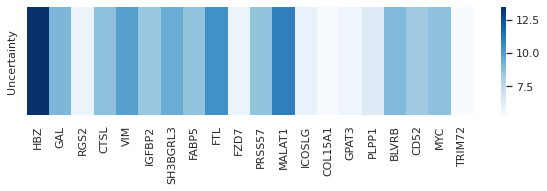

In [49]:
get_plot('EGR1+ctrl')

0.24548926129339926


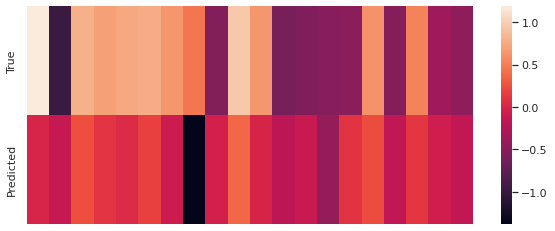

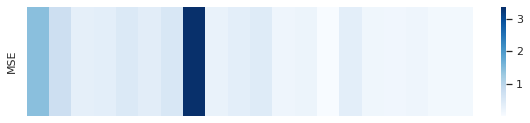

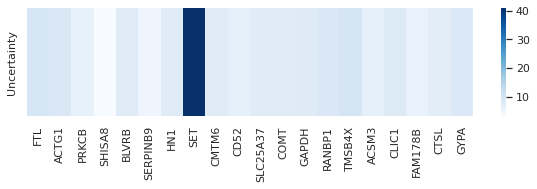

In [50]:
get_plot('ctrl+SET')

0.32105530405328103


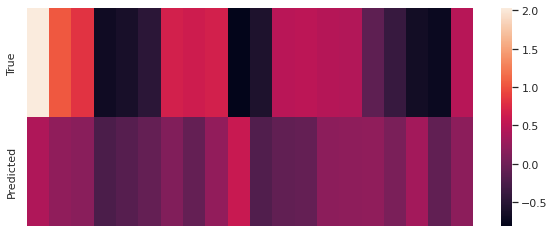

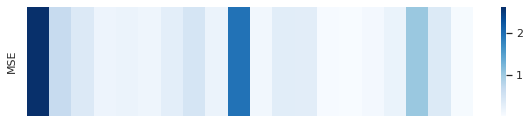

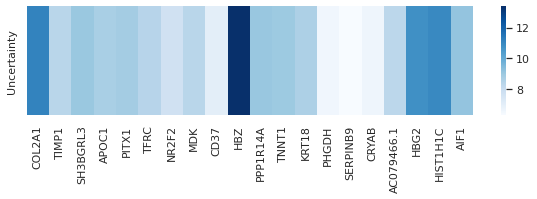

In [51]:
get_plot('COL2A1+ctrl')

0.36399342880125557


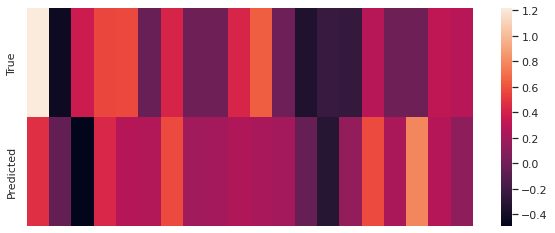

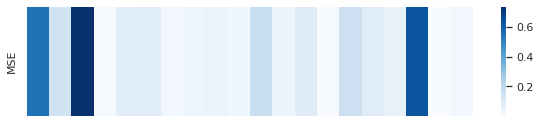

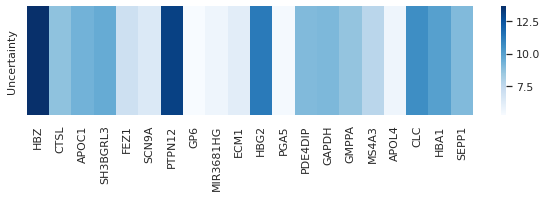

In [52]:
get_plot('FOSB+PTPN12')

In [53]:
{i: j['pearson_delta_top20_de'] for i,j in out.items()}

{'AHR+KLF1': 0.5762896923321139,
 'ARID1A+ctrl': 0.4762255597293892,
 'BCL2L11+BAK1': 0.8624567570003583,
 'BCL2L11+TGFBR2': 0.847291568375795,
 'BCL2L11+ctrl': 0.7443594514557997,
 'BCORL1+ctrl': 0.2184269596626052,
 'BPGM+SAMD1': 0.8466381256400561,
 'BPGM+ZBTB1': 0.8755539598775275,
 'BPGM+ctrl': 0.7813885262759193,
 'C3orf72+FOXL2': -0.4780150288361101,
 'C3orf72+ctrl': 0.6015940489511549,
 'CBL+CNN1': 0.8695420658665702,
 'CBL+PTPN12': 0.8698208607737907,
 'CBL+PTPN9': 0.919111566338034,
 'CBL+TGFBR2': 0.7942512004735328,
 'CBL+UBASH3A': -0.03875580002892303,
 'CBL+UBASH3B': 0.9551914539409893,
 'CBL+ctrl': 0.5880944834109955,
 'CDKN1A+ctrl': 0.591493026177867,
 'CDKN1B+CDKN1A': 0.9690514468464688,
 'CDKN1B+ctrl': 0.9188458419535567,
 'CDKN1C+CDKN1A': 0.7633245479423519,
 'CDKN1C+CDKN1B': 0.9395816230754688,
 'CDKN1C+ctrl': 0.7583045936136746,
 'CEBPB+CEBPA': 0.9961576911996184,
 'CEBPB+MAPK1': 0.8474941682917226,
 'CEBPB+OSR2': 0.919280990821874,
 'CEBPB+PTPN12': 0.80689227301269